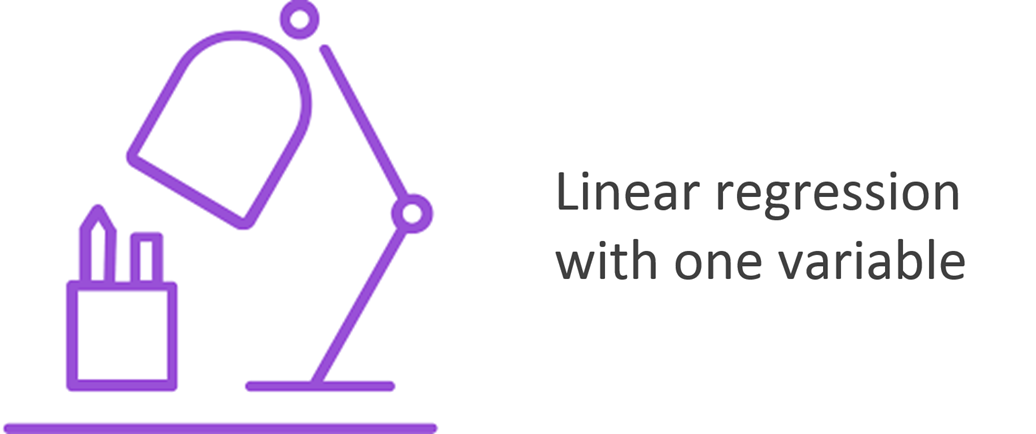
## In this exercise, you will implement linear regression and get to see it work on data.
By EnnioPixel based on Stanford University Prof. Andrew NG course.

The classic example of the application of linear regression is to predict a result $(y)$, for example the price of a house in a given neighborhood, based on one or more inputs $(x_i)$, for example the size of the house or the room's number.

Another possible problem is to predict the profit of an investment related to the population of a city. 

We can achieve these results by using the Linear Regression model and a training set of data to evaluate the parameters.

It is a case of Supervised Learning because the “right answer” is given for each example in the data.

It is a Linear Regression problem because it produces a real-valued output instead of the "classification" problem which produces a discrete-valued output.



In [ ]:
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.mplot3d import axes3d

## We are looking for a function 

$$ h_θ(x) = θ_0 + θ_1x $$

which is able to make the prediction, where $θ_0$ and $θ_1$ are paramethers to be found. In this case the regression is univariate because there is just one variable x.
In order to calculate the value of the $\theta$ values we must execute some matrix operations as transpose addiction/subtraction, multiplication.
So as a warm up exercise, we will test how to define a matrix starting from an identity matrix, then we will transpose the matrix and multiply the matrix with its transpose 


In [ ]:
print('Running warmUpExercise ...')
print('5x5 Identity Matrix:')
A = np.eye(5)
print(A)
A[3,0]=2.5
print(np.transpose(A))
print (np.dot(A,np.transpose(A)))

## We upload the csv training data set and automatically generate the code to read it

By using the Watson Studio capabilities we can automatically generate the necessary code to read a csv file into an array.
The data are loaded in the array df_data_1 and we can assign to the X and y variables the two columns.

In [ ]:
import sys
import types
import pandas as pd
#%cd ..
#%cd Bergamo
#!dir
#df_data_1 = pd.read_csv("ex1data1.csv")
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c-XvXnUYEDK6D9_FLsF0UsEKMJhaXv3NhZHxOFQrglki',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='prova-donotdelete-pr-htwa8abspyrjpu',Key='ex1data1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
X=df_data_1.values[:,0]
y=df_data_1.values[:,1]

df_data_1

## We show data on a scatter plot

By using the capabilities of matplotlib library we plot the X,y data on a diagram
We attribute to the data the mining of Population of city versus Profit

In [ ]:
from matplotlib.pyplot import subplots, show
print('Plotting Data ...')

fig, ax = subplots()
ax.scatter(X,y, facecolor='red',marker='+')
ax.set_title("Training set")
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")
show()

You can see that the data are spanned being real collected data

## We initialize θ and modify the X array for the "Cost Function" evaluation 

The cost function is defined as the squared error function calculated between the function evaluation $ h_θ(x)$ and the training data y and it's meaning is a calculation of the difference between evaluated and measured y data. 
The purpose of the algorithm is to minimize this difference.
To do this we preliminarly add a "ones" column before the X value and set to 0 the $\theta$ values. We make also some settings that will be used in the next algorithm, regarding which we will discuss later.
To add the column after setting it to "ones" by means of the ones function, we use the instruction column_stack.

In [ ]:
lunghezza=len(X)
z = np.ones([lunghezza,1])

X=np.column_stack((z, X))

theta = np.zeros([2])# initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

## We write a function to calculate the Cost Function
We use the function just because it will be called many times is different part of the code.
The squared error function is defined as follows: 
$$ J(θ_0,θ_1)= \frac{1}{2m}\sum_{i=1}^{m} (h_θ(x_i)-y_i)^2$$
If we consider the value of the $h_θ(x)$ function the previous expression becomes:
$$ J(θ_0,θ_1)= \frac{1}{2m}\sum_{i=1}^{m} (Xθ-y_i)^2$$
Where $\theta$ is a matrix mx2 and $\theta$ is a vector 2x1. By multiplying these two matrix we will obtain a mx1 vector and we will be able to subtract the y vector.
This is the function we have to minimize.

In [ ]:
#COMPUTECOST Compute cost for linear regression
#   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y

# Initialize some useful values
def computeCost(x, y, theta):
    m = len(y); # number of training examples

# You need to return the following variables correctly 
    J = 0;

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta
#               You should set J to the cost.

    Jtmp=sum((np.dot(X,theta)-y)**2)

    J = 1 / (2 * m) * Jtmp

#    print(J)
# =========================================================================
    return J
computeCost(X, y, theta)

## We write the algorithm to minimize the Cost Function
The algorithm is based on the minimization of $J(θ_0,θ_1)$ and it is called Gradient Descent.

The idea is that we can start from an initial random $\theta$ value and then we can modify it by moving on the slant of the $J$ surface, hoping that this process will converge.

In order to better understand we can simplify the approach by considering just a stright line passing from the origin: in this case  
$\theta$ is a scalar (the slope of the line).


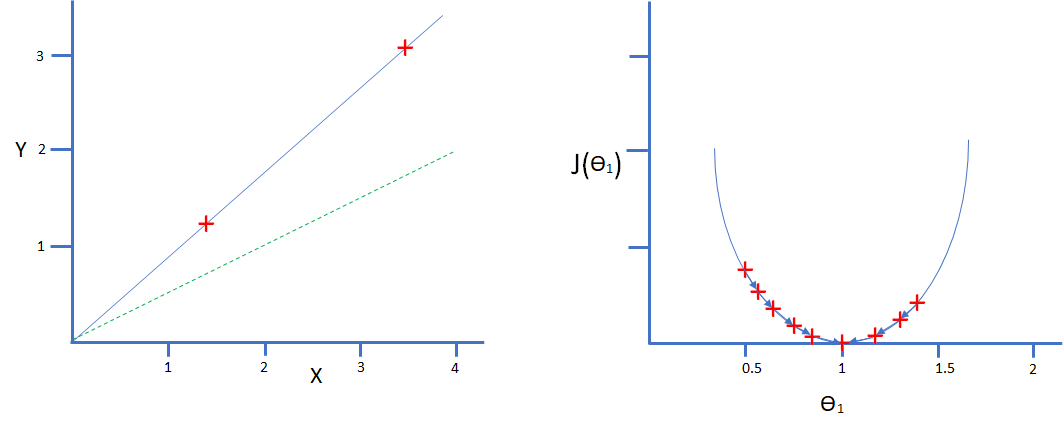

If we for instance start from a $\theta$ value of 0.5 which corresponds to the green dashed line in the left diagram and to the left upper point in the right diagram we can modify the initial value by adding the local slope (derivative of the $J$ function) to that value. If we consider that the left slope is negative, it means that we must subtract the derivative of the $J$ from the initial value of $\theta$. The approach is the same if we start from a 1.5 value, because in this case the $J$ local slope is positive and we must subtract the value.

So, in this case, the algorithm is 
$$\theta_1 := \theta_1 -  \alpha \frac {\partial J(\theta_1)}{\partial \theta_1}$$

By generalizing to the generic univariate case, we have 

$$\theta_j := \theta_j - \alpha \frac {\partial J(\theta_0,\theta_1)}{\partial \theta_j} \space for \space J=0 \space and \space J=1$$

where $\alpha$ is the so-called learning rate which define the "lenght" of the single step of iteration and which we set before to 0.01

## Mind
the update of $theta_0$ and $\theta_1$ must be simultaneus:

$temp0 := \theta_0 -  \alpha \frac {\partial J(\theta_0,\theta_1)}{\partial \theta_0}$

$temp1 := \theta_1 -  \alpha \frac {\partial J(\theta_0,\theta_1)}{\partial \theta_1}$

$\theta_0 := temp0$

$\theta_1 := temp1$

## this is incorrect

$temp0 := \theta_0 -  \alpha \frac {\partial J(\theta_0,\theta_1)}{\partial \theta_0}$

$\theta_0 := temp0$

$temp1 := \theta_1 -  \alpha \frac {\partial J(\theta_0,\theta_1)}{\partial \theta_1}$

$\theta_1 := temp1$

If we substitute the Cost Function value we get the algorithm:

$$\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m} (h_θ(x_i)-y_i)$$

$$\theta_1 := \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m} (h_θ(x_i)-y_i)x_i$$




In [ ]:
#function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
m = len(y); # number of training examples

num_iters=iterations
theta1 = np.zeros([2])
J_history = np.zeros(num_iters)

for iter in range(num_iters):

    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    #

    Gtmp=np.dot(X,theta1)-y

    a1=theta1[0] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,0]))
    b1=theta1[1] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,1]))
    theta1[0] = a1
    theta1[1] = b1
    # ============================================================

    # Save the cost J in every iteration    
    J_history[iter] = computeCost(X, y, theta1)
    

## We obtained the $\theta$ values 
we can overlay the $h(\theta)$ function on the previous scatter plot.

We can also make a prediction 

In [ ]:
#
# Compare with Scikit-learn Linear regression 
from sklearn.linear_model import LinearRegression
skl = LinearRegression()
skl.fit(X[:,1].reshape(-1,1), y.ravel())

#Compare with Scipy 
from scipy import stats
gradient,intercept,r_value,p_value,std_err=stats.linregress(X[:,1],y)

# Plot the linear fit
fig, ax = subplots()
ax.scatter(X[:,1],y, facecolor='red',marker='+')
ax.set_title("Training data and prediction function")
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")
#Gradient descent
ax.plot(X[:,1],np.dot(X, theta1), label='Linear regression Gradient Descent')
#Scikit-Learn
ax.plot(X[:,1], skl.intercept_+skl.coef_*X[:,1], label='Linear regression Scikit-Learn')
#Scipy
ax.plot(X[:,1], intercept+gradient*X[:,1], label='Linear regression Scipy')
ax.legend(loc=4)

show()
#print R square in the different cases
#Gradient Descent
y_mean=np.mean(y)
SS_tot=0
SS_reg=0
SS_res=0
for i in range(len(y)):
    SS_tot=SS_tot + (y[i]-y_mean)**2
    f_i=np.dot(np.transpose(theta1),[1, X[i,1]])
    SS_reg=SS_reg + (f_i-y_mean)**2
    SS_res=SS_res + (y[i]-f_i)**2
R_squared=1-(SS_res/SS_tot)
print("Gradient Descent Gradient and Intercept", theta1[1], theta1[0])
print("R_squared from Gradient Descent", R_squared)
print("")
#Scikit-Learn
from sklearn.metrics import r2_score
print("Scikit-Learn Gradient and intercept",skl.coef_,skl.intercept_)
print("Scikit-Learn R-squared",r2_score(y,skl.intercept_+skl.coef_*X[:,1]))
print("")
#Scipy
print("Scipy Gradient and intercept",gradient,intercept)
print ("Scipy R-squared",r_value**2)
print("")

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.transpose(theta1),[1, 3.5])
print('For population = 35,000, we predict a profit of ', predict1 * 10000)
predict2 = np.dot(np.transpose(theta1),[1, 7])
print('For population = 70,000, we predict a profit of ', predict2 * 10000)


## We plot the $J$ function  

In [ ]:
#============= Part 4: Visualizing J(theta_0, theta_1) =============
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 50)
theta1_vals = np.linspace(-1, 4, 50)
x_axe, y_axe = np.meshgrid(theta0_vals, theta1_vals, indexing='xy')

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

# Calculate J_vals-values based on grid's input
for (i,j),v in np.ndenumerate(J_vals):
    t = [theta0_vals[j], theta1_vals[i]]
    J_vals[i,j] = computeCost(X,y, t)

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1,2,2, projection='3d')

# Plot
ax.plot_surface(x_axe, y_axe, J_vals, rstride=1, cstride=1, alpha=0.9, cmap=plt.cm.jet, linewidth=0.5, edgecolors='b' )
ax.set_zlabel('Cost')
ax.set_zlim(J_vals.min(),J_vals.max())
ax.view_init(elev=15, azim=230)


for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=18)
    ax.set_ylabel(r'$\theta_1$', fontsize=18)

## We show the contour of $J$ function with the evidence of the minimum

In [ ]:
plt.figure()

levels = np.arange(0, 800, 20)#define the Z range and the Z steps for contour
CS = plt.contour(J_vals, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-10,10, -1, 4))
plt.scatter(theta1[0], theta1[1], facecolor='red',marker='+')#add the minimum on the plot
